In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pdfkit

In [15]:
# Lees het CSV-bestand in een Pandas DataFrame
df = pd.read_csv('pose_data.csv')

In [16]:
# Detecteer abnormaliteiten met behulp van Isolation Forest
model_isolation_forest = IsolationForest(contamination=0.05)
model_isolation_forest.fit(df[['Keypoint Score', 'X', 'Y']])
df['Isolation Forest'] = model_isolation_forest.predict(df[['Keypoint Score', 'X', 'Y']])


c:\Users\K1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [17]:
# Detecteer abnormaliteiten met behulp van K-Means clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Keypoint Score', 'X', 'Y']])
model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(scaled_data)
df['K-Means'] = model_kmeans.labels_

In [18]:
# Voer PCA uit op de gegevens voor visualisatie
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]


Gedetecteerde abnormaliteiten volgens Isolation Forest:
      Frame                         Keypoint ID  Keypoint Score  \
0       175  [0.39124873 0.509135   0.6971745 ]         0.30715   
159     361  [0.392441   0.52968234 0.59847355]         0.31510   
160     362  [0.39164996 0.5283292  0.51423556]         0.31773   
161     363  [0.39569816 0.5274846  0.60784185]         0.31993   
162     364  [0.40157443 0.52672994 0.67247975]         0.32381   
...     ...                                 ...             ...   
1141   1819  [0.6008679  0.41466928 0.5612638 ]         0.37969   
1142   1820  [0.59384114 0.41687152 0.5963286 ]         0.38022   
1143   1821  [0.5877957  0.41567686 0.62541527]         0.38022   
1168   1865  [0.50373924 0.40304148 0.39784825]         0.30650   
1370   2104  [0.55884415 0.35518745 0.5841173 ]         0.31205   

                     Keypoint Visibility                 Keypoint Likelihood  \
0     [0.31303376 0.4941229  0.5130664 ]  [0.31437805 0.445

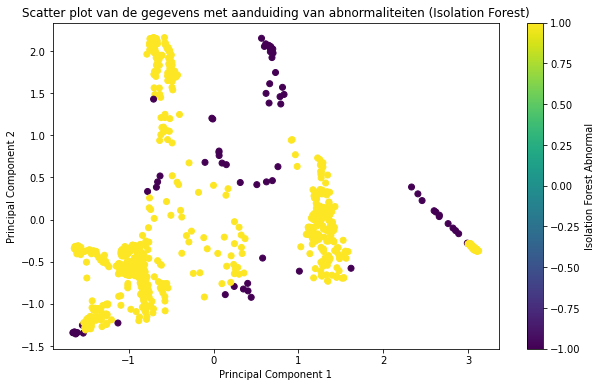

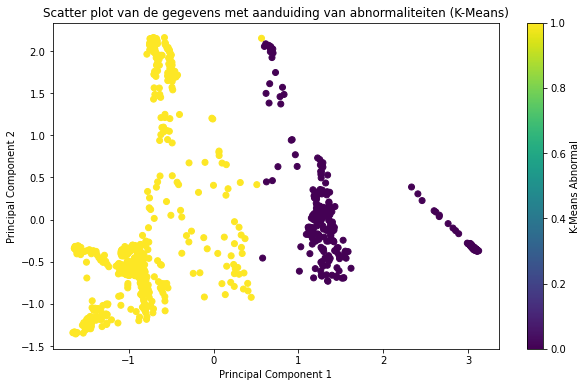

In [19]:
# Rapport met tabellen en grafieken
with pd.option_context('display.float_format', '{:.5f}'.format):
    # Tabel met de gedetecteerde abnormaliteiten volgens Isolation Forest
    isolation_forest_table = df[df['Isolation Forest'] == -1]
    print('Gedetecteerde abnormaliteiten volgens Isolation Forest:')
    print(isolation_forest_table)

    # Tabel met de gedetecteerde abnormaliteiten volgens K-Means clustering
    kmeans_table = df[df['K-Means'] == 1]
    print('Gedetecteerde abnormaliteiten volgens K-Means clustering:')
    print(kmeans_table)

    # Scatter plot van de gegevens met aanduiding van de abnormaliteiten volgens Isolation Forest
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PC1'], df['PC2'], c=df['Isolation Forest'], cmap='viridis')
    plt.colorbar(label='Isolation Forest Abnormal')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Scatter plot van de gegevens met aanduiding van abnormaliteiten (Isolation Forest)')
    plt.savefig('scatter_isolation_forest.png')

    # Scatter plot van de gegevens met aanduiding van de abnormaliteiten volgens K-Means clustering
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PC1'], df['PC2'], c=df['K-Means'], cmap='viridis')
    plt.colorbar(label='K-Means Abnormal')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Scatter plot van de gegevens met aanduiding van abnormaliteiten (K-Means)')
    plt.savefig('scatter_kmeans.png')

In [22]:
# Maak een PDF-bestand van de rapportage
pdfkit.from_file('rapport.html', 'rapport.pdf')

OSError: No wkhtmltopdf executable found: "b''"
If this file exists please check that this process can read it or you can pass path to it manually in method call, check README. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf